## Загрузка моделей и данных

In [1]:
!pip install -q -U scikit-learn
!pip install -q -U aiogram
!pip install -q typing-extensions==4.7.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.8/510.8 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 kB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 56.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires openai, which is not installed.
llmx 0.0.15a0 requires tiktoken, which is not installed.
tensorflow-probability 0.22.0 requires typing-extensions<4.6.0, but you have typing-extensions 4.9.0 which i

In [2]:
!pip install -q -U wldhx.yadisk-direct nltk pandarallel pymorphy2 pandas
!curl -L $(yadisk-direct https://disk.yandex.ru/d/Ihh18yf4807QPA) -o data.zip
!unzip data.zip

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 49.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 27.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
bigframes 0.18.0 requires pandas<2.1.4,>=1.5.0, but you have pandas 2.1.4 which is incompatible.
google-colab 1.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import nltk
import joblib
from collections import Counter

nltk.download('stopwords')
from pandarallel import pandarallel
import re
from pymorphy2 import MorphAnalyzer
from nltk.corpus import stopwords
pd.set_option('max_colwidth', None)
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from scipy.sparse import hstack
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import warnings
from sklearn.metrics.pairwise import cosine_similarity

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
!git clone https://github.com/konstantinator/hse_project.git
with open('hse_project/bin/lr.pkl', 'rb') as f:
    lr = joblib.load(f)
with open('hse_project/bin/sw.pkl', 'rb') as f:
    stopwords_ru=joblib.load(f)
with open('hse_project/bin/enc_full.pkl', 'rb') as f:
    enc_full = joblib.load(f)
with open('hse_project/bin/dec.pkl', 'rb') as f:
    dec = joblib.load(f)

Cloning into 'hse_project'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 52 (delta 7), reused 31 (delta 4), pack-reused 0
Receiving objects: 100% (52/52), 6.87 MiB | 18.95 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [5]:
df_source = pd.read_csv('final_dataset.csv' )
df_source_new = df_source[(df_source['topic']!='Россия') & (df_source['topic']!='Мир')]

In [6]:
res = []
for topic in df_source_new['topic'].unique():
    res.append(df_source_new[df_source_new['topic']==topic].sample(100))

In [7]:
df_base = pd.concat(res)
df_base = df_base.reset_index(drop=True)

In [8]:
vectors = enc_full.transform(df_base['title'] + ' ' + df_base['text']).toarray()

In [9]:
def get_sim_text(example):
    simili = cosine_similarity(vectors, enc_full.transform([example]).toarray())
    arg = simili.argmax()
    samp = df_base.iloc[arg,:]
    return f'Title: {samp.title} \n Body: {samp.text} \n class: {samp.topic}'

In [10]:
ind=2
example = df_base['title'].values[ind] + ' ' + df_base['text'].values[ind]
print(get_sim_text(example))

Title: Минфин задумался о включении Кипра и Люксембурга в черный список офшоров   
 Body: Министерство финансов России сообщило о том, что у него появились основания включить Кипр и Люксембург в черный список офшоров. Об этом в номере от 28 ноября пишут «Ведомости» со ссылкой на главу налогового департамента ведомства Илью Трунина. Такое заявление прозвучало после того, как Глобальный форум по обмену информацией для налоговых целей назвал Люксембург и Кипр не соответствующими стандартам прозрачности. Форум, считающий, что обе этих страны не способны предоставить информацию в полном объеме, имеет мандат группы G20. Сейчас российские налоговики неспособны в полной мере применить антиофшорные законы, поскольку около четверти всех запросов ФНС в другие страны остается без ответа. По словам Трунина, запросы игнорируются странами, с которыми нет специальных соглашений об обмене информацией. В их число входят и Люксембург, и Кипр. Если Минфин все же примет такое решение, российские компании л

In [11]:
df_base.iloc[2,:]

title                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [12]:
# !rm -rf hse_project

In [13]:
patterns = r'[^a-zA-Zа-яА-Я0-9ёЁ]'
morph = MorphAnalyzer()

def preprocess(text):
    return ' '.join([morph.normal_forms(i)[0] for i in re.sub(patterns, ' ', text.lower()).split() if i not in stopwords_ru])

In [14]:
example = '''Some Tittle

Some body'''

In [15]:
title_body = example
title_body = preprocess(title_body)
X_pred = enc_full.transform([title_body])
dec[lr.predict(X_pred)[0]]

'Из жизни'

In [16]:
def predict(example):
    title_body = example
    title_body = preprocess(title_body)
    X_pred = enc_full.transform([title_body])
    return dec[lr.predict(X_pred)[0]]

In [17]:
answer = predict(example)

In [18]:
try:
    answer = predict(example)
except:
    answer = 'Error'

In [19]:
answer

'Из жизни'

## Асинхронный бот

###Функции, которые использует Бот

In [21]:
def predict_lr(example):
    title_body = example
    title_body = preprocess(title_body)
    X_pred = enc_full.transform([title_body])
    return dec[lr.predict(X_pred)[0]]

def predict_rf(example):
    title_body = example
    title_body = preprocess(title_body)
    X_pred = enc_full.transform([title_body])
    return dec[rf.predict(X_pred)[0]]

def predict_proba(example):
    title_body = example
    title_body = preprocess(title_body)
    X_pred = enc_full.transform([title_body])
    probs = lr.predict_proba(X_pred)[0]
    return [(dec[i], probs[i]) for i in range(9)]

def format_predictions(predictions):
    predictions = sorted(predictions, key=lambda x: x[1], reverse=True)
    formatted_predictions = [f"{category}: {probability:.2f}" for category, probability in predictions]
    return ',\n'.join(formatted_predictions)

### Импорты

In [22]:
# !pip install networkx matplotlib
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 397.5/397.5 kB 4.6 MB/s eta 0:00:00


In [23]:
import asyncio
import logging
from aiogram import Bot, Dispatcher, types, Router
from aiogram.filters.command import Command
from aiogram import F
from aiogram.types import Message
from aiogram.filters import Command
from aiogram.enums import ParseMode
from aiogram import html
from aiogram.filters import Command
from aiogram.types import ReplyKeyboardMarkup
from aiogram.utils.keyboard import ReplyKeyboardBuilder
from aiogram.types import Message, ReplyKeyboardRemove
from aiogram.filters import Command, StateFilter
from aiogram.fsm.context import FSMContext
from aiogram.fsm.state import StatesGroup, State
from aiogram.fsm.state import default_state
import emoji
import aiofiles

### Возможные состояния и граф состояний

Состояния это ожидания определенного воода от пользователя

In [24]:
class BotStates(StatesGroup):
    registration_state = State()
    main_menu_state = State()           # Главное меню
    choosing_model_state = State()      # Выбор модели
    logreg_state = State()              # Вставка новости для лог рег
    randomforest_state = State()        # Вставка новости для randomForest
    lr_prob_state = State()             # Вывод уверенность logreg своем ответе
    rf_prob_state = State()             # Вывод уверенность randomForest своем ответе
    sim_state = State()            # Вставка новости для поиска похожей
    rate_state = State()                # Вставка новости для поиска подходящей

In [25]:
# !pip install pydot

In [26]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

# Добавляем узлы и ребра
G.add_edge("Регистрация", "Главное меню")
G.add_edge("Главное меню", "Подбери заголовок")
G.add_edge("Главное меню", "Поиск похожего")
G.add_edge("Главное меню", "Оценка бота")
G.add_edge("Подбери заголовок", "LogReg")
G.add_edge("Подбери заголовок", "RandomForest")
G.add_edge("LogReg", "Уверенность logReg")
G.add_edge("RandomForest", "Уверенность randomForest")

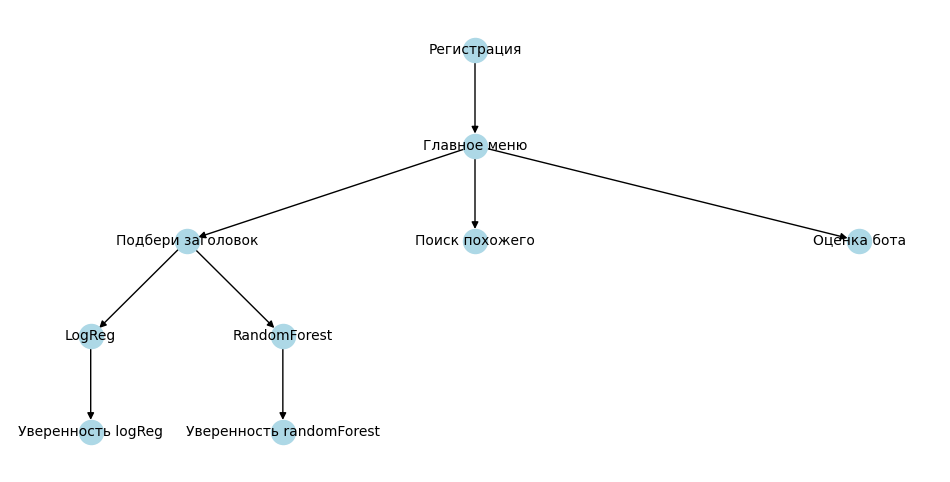

In [27]:
# Визуализация состояний
# Установка позиций узлов
pos = {
    "Регистрация": (0, 5),
    "Главное меню": (0, 4),
    "Подбери заголовок": (-0.75, 3),
    "Поиск похожего": (0, 3),
    "Оценка бота": (1, 3),
    "LogReg": (-1, 2),
    "Уверенность logReg": (-1, 1),
    "RandomForest": (-0.5, 2),
    "Уверенность randomForest": (-0.5, 1)
}

fig, ax = plt.subplots(figsize=(12, 6))
nx.draw(G, pos, with_labels=True, node_color='lightblue', font_size=10, arrows=True)
plt.show()

In [28]:
# Словарь для сопоставления человеко-читаемых названий с идентификаторами
node_to_state = {
    "Регистрация": BotStates.registration_state,
    "Главное меню": BotStates.main_menu_state,
    "Подбери заголовок": BotStates.choosing_model_state,
    "LogReg": BotStates.logreg_state,
    "Уверенность logReg": BotStates.lr_prob_state,
    "RandomForest": BotStates.randomforest_state,
    "Уверенность randomForest": BotStates.rf_prob_state,
    "Поиск похожего": BotStates.sim_state,
    "Оценка бота": BotStates.rate_state
}

class GraphNavigator:
    def __init__(self, graph, node):
        self.graph = graph
        self.current_node = node

    def move_to_node(self, node):
        if node in self.graph:
            self.current_node = node

    def get_parent(self):
        if self.current_node == "Регистрация":
            return "Регистрация"
        parent = list(self.graph.predecessors(self.current_node))[0]
        return parent

    def move_to_parent(self):
        self.current_node = self.get_parent()

    def get_current_node(self):
        return self.current_node

In [29]:
test = GraphNavigator(G, "Главное меню")
test.get_parent()

'Регистрация'

### Кнопки (Клавиатуры) для бота

In [30]:
# keyboards/keyboard_for_main_menu.py
def keyboard_for_main_menu() -> ReplyKeyboardMarkup:
    kb = ReplyKeyboardBuilder()
    kb.button(text="Отнеси мою новость к нужной теме")
    kb.button(text="Найди новость похожую на мою")
    kb.button(text="Оценить бота")
    kb.button(text="Назад")
    kb.adjust(2)
    return kb.as_markup(resize_keyboard=True)

In [31]:
# keyboards/keyboard_for_leaf_vertex.py
def keyboard_for_leaf_vertex() -> ReplyKeyboardMarkup:
    kb = ReplyKeyboardBuilder()
    kb.button(text = "Назад")
    kb.adjust(1)
    return kb.as_markup(resize_keyboard=True)

In [32]:
# keyboards/keyboard_for_choosing_models.py
def keyboard_for_choosing_models() -> ReplyKeyboardMarkup:
    kb = ReplyKeyboardBuilder()
    kb.button(text="Логистическая регрессия")
    kb.button(text="Random Forest")
    kb.button(text="Назад")
    kb.adjust(1)
    return kb.as_markup(resize_keyboard=True)

In [33]:
# keyboard/keyBoard_for_prob
def keyBoard_for_prob() -> ReplyKeyboardMarkup:
    kb = ReplyKeyboardBuilder()
    kb.button(text="Покажи процент уверенности модели")
    kb.button(text="Назад")
    kb.adjust(1)
    return kb.as_markup(resize_keyboard=True)

In [34]:
# keyboards/keyboard_for_rating.py
def keyboard_for_rating() -> ReplyKeyboardMarkup:
    kb = ReplyKeyboardBuilder()
    kb.button(text="Плохо " + emoji.emojize(":face_with_symbols_on_mouth:"))
    kb.button(text="Хорошо 🙂")
    kb.button(text="Отлично 😀")
    kb.button(text="Назад")
    kb.adjust(2)
    return kb.as_markup(resize_keyboard=True)

In [35]:
print(emoji.demojize("🎉"))

:party_popper:


###Хэндлеры для бота. По сути это обработчики сообщений от пользователя

In [36]:
# handlers/start.py
# from keyboards/keyboard_for_start.py import get_keyBoard_for_start

router = Router()

# @router.message(StateFilter(None), Command("start"))
@router.message(Command("start"))
async def cmd_start(message: Message, state: FSMContext):
    # Очищаем сохраненные данные
    await state.clear()
    await state.update_data(navigator = "Регистрация")
    await message.answer(text="Для продолжения введите свое имя",
                         reply_markup = ReplyKeyboardRemove())
    # Устанавливаем пользователю состояние "Регистрация"
    await state.set_state(BotStates.registration_state)

In [37]:
# handlers/registration_state.py
@router.message(BotStates.registration_state)
async def cmd_start(message: Message, state: FSMContext):
    await message.answer(
        text = f"Добро пожаловать, {message.text}!\nВыберите одну из опций",
        reply_markup = keyboard_for_main_menu()
    )
    # Устанавливаем пользователю состояние "Главное меню"
    await state.update_data(user_name = message.text)
    await state.update_data(navigator = "Главное меню")
    await state.set_state(BotStates.main_menu_state)

In [38]:
# handlers/back.py
@router.message(F.text.lower() == "назад")
async def back_to_menue(message: Message, state: FSMContext):
    user_data = await state.get_data()
    current_state_name = user_data['navigator']
    graph_navigator = GraphNavigator(G, current_state_name)
    parent_state_name = graph_navigator.get_parent()
    parent_state = node_to_state[parent_state_name]
    if parent_state_name == "Регистрация":
        await message.answer(text="Введите свое имя",
                             reply_markup=ReplyKeyboardRemove())
    if parent_state_name == "Главное меню":
        await message.answer(text="Главное меню",
                             reply_markup = keyboard_for_main_menu())
    if parent_state_name == "Подбери заголовок":
        await message.answer(text="Попробуйте выбрать другую модель",
                             reply_markup = keyboard_for_choosing_models())
    if parent_state_name == "LogReg":
        await message.answer(text="Введите другую новость.\nВыбранная модель: LogReg",
                             reply_markup=keyboard_for_leaf_vertex())
    if parent_state_name == "RandomForest":
        await message.answer(text="Введите другую новость.\nВыбранная модель: Random Forest",
                             reply_markup=keyboard_for_leaf_vertex())
    await state.update_data(navigator = parent_state_name)
    await state.set_state(state = parent_state)

In [39]:
# handlers/main_menu_state.py
# from keyboards/keyboard_for_choosing_models.py import keyboard_for_choosing_models

# если в главном меню выбрали "отнеси мою новость к нужной теме"
@router.message(
    BotStates.main_menu_state,
    F.text.lower() == "отнеси мою новость к нужной теме"
)
async def task_chosen_topic(message: Message, state: FSMContext):
    await message.answer(
        text = "Теперь, пожалуйста, выберите модель",
        reply_markup = keyboard_for_choosing_models()
    )
    await state.update_data(navigator = "Подбери заголовок")
    await state.set_state(BotStates.choosing_model_state)

# если в главном меню выбрали "найди новость похожую на мою"
@router.message(
    BotStates.main_menu_state,
    F.text.lower() == "найди новость похожую на мою"
)
async def task_chosen_sim(message: Message, state: FSMContext):
    await message.answer(
        text = "Вы выбрали поиск похожей новости!\nТеперь вставьте сюда текст Вашей новости",
        reply_markup = keyboard_for_leaf_vertex()
    )
    await state.update_data(navigator = "Поиск похожего")
    await state.set_state(BotStates.sim_state)

# если в главном меню выбрали "Оценить юота"
@router.message(
    BotStates.main_menu_state,
    F.text.lower() == "оценить бота"
)
async def task_chosen_rate(message: Message, state: FSMContext):
    # Проверяем, оставлял ли пользователь оценку ранее
    user_data = await state.get_data()
    user_name = user_data['user_name']
    users = []
    try:
        async with aiofiles.open("rating", 'r') as file:
            async for line in file:
                users.append(line.split(':')[0].strip())
    except FileNotFoundError:
        users = []
    if user_name in users:
        await message.answer(
            text = "Пользователь с таким именем уже оценил бота❗️\nЧтобы изменить оценку нажмите на кнопку из списка ниже",
            reply_markup = keyboard_for_rating())
    else:
        await message.answer(
            text = "Спасибо, что решили оценить бота!\nВыберите оценку из списка ниже",
            reply_markup = keyboard_for_rating()
        )
    await state.update_data(navigator = "Оценка бота")
    await state.set_state(BotStates.rate_state)

In [40]:
# handlers/choosing_models_state.py
# from keyboards/keyboard_for_choosing_models.py import keyboard_for_choosing_models

# Роутер для обработка запроса "LogReg"
# handlers/logreg.py
@router.message(BotStates.choosing_model_state,
                F.text.lower() == "логистическая регрессия")
async def log_reg_chosen(message: Message, state: FSMContext):
    await message.answer(
        text = "Поздравляю, вы выбрали логистическую регрессию! Теперь отправте боту Вашу новость",
        reply_markup = keyboard_for_leaf_vertex()
    )
    await state.update_data(navigator = "LogReg")
    await state.set_state(BotStates.logreg_state)

# Роутер для обработка запроса "RandomForest"
# handlers/random_forest.py
@router.message(BotStates.choosing_model_state,
                F.text.lower() == "random forest")
async def random_forest_chosen(message: Message, state: FSMContext):
    await message.answer(
        text = "Поздравляю, вы выбрали random forest! Теперь отправте боту Вашу новость",
        reply_markup = keyboard_for_leaf_vertex()
    )
    await state.update_data(navigator = "RandomForest")
    await state.set_state(BotStates.randomforest_state)

# Роутер для обработки некорректных вводов
# handlers/incorrect model.py
@router.message(BotStates.choosing_model_state,
                F.text.lower() != "назад")
async def task_chosen_incorrectly(message: Message, state: FSMContext):
    await message.answer(
        text = "Некорректный ввод.\n\n"
             "Пожалуйста, выберите модель из списка ниже:",
        reply_markup = keyboard_for_choosing_models()
    )

In [41]:
node_to_sate = {
    "Регистрация": BotStates.registration_state,
    "Главное меню": BotStates.main_menu_state,
    "Подбери заголовок": BotStates.choosing_model_state,
    "LogReg": BotStates.logreg_state,
    "Уверенность logReg": BotStates.lr_prob_state,
    "RandomForest": BotStates.randomforest_state,
    "Уверенность randomForest": BotStates.rf_prob_state,
    "Поиск похожего": BotStates.sim_state,
    "Оценка приложения": BotStates.rate_state
}

In [42]:
# Хэндлеры для обработки текстов новостей

# Вывод результата Лог рег
@router.message(BotStates.logreg_state)
async def log_reg_answer(message: Message, state: FSMContext):
    await state.update_data(predict_probabilities = format_predictions(predict_proba(message.text.lower()))) # запоминаем вероятности для следующего шага
    await message.answer(
        text = predict_lr(message.text.lower()),
        reply_markup = keyBoard_for_prob()
    )
    await state.update_data(navigator = "Уверенность logReg")
    await state.set_state(BotStates.lr_prob_state)

# Вывод результата Random Forest
# handlers/text_analysis_by_randomForesr.py
@router.message(BotStates.randomforest_state)
async def log_reg_answer(message: Message, state: FSMContext):
    await state.update_data(predict_probabilities = format_predictions(predict_proba(message.text.lower()))) # запоминаем вероятности для следующего шага
    await message.answer(
        text = predict_lr(message.text.lower()),
        reply_markup = keyBoard_for_prob()
    )
    await state.update_data(navigator = "Уверенность randomForest")
    await state.set_state(BotStates.lr_prob_state)

# Вывод результата Similar_text
# handlers/similar_search.py
@router.message(BotStates.sim_state)
async def raandom_forest_answer(message: Message, state: FSMContext):
    await message.answer(
        text = get_sim_text(message.text.lower()),
        reply_markup = keyboard_for_leaf_vertex()
    )

In [43]:
# Хэндлеры для обработки запросов уверенности
# handlers/lr_prob.py
@router.message(BotStates.lr_prob_state,
                F.text.lower() == "покажи процент уверенности модели")
async def task_chosen_incorrectly(message: Message, state: FSMContext):
    user_data = await state.get_data()
    await message.answer(
        text = user_data['predict_probabilities'],
        reply_markup = keyboard_for_leaf_vertex()
    )

# handlers/rf_prob.py
@router.message(BotStates.rf_prob_state,
                F.text.lower() == "покажи процент уверенности модели")
async def task_chosen_incorrectly(message: Message, state: FSMContext):
    user_data = await state.get_data()
    await message.answer(
        text = user_data['predict_probabilities'],
        reply_markup = keyboard_for_leaf_vertex()
    )

In [44]:
# Хэндлеры для оценки работы бота
# handlers/lr_prob.py
@router.message(BotStates.rate_state,
                F.text.lower() == "плохо 🤬")
async def task_chosen_incorrectly(message: Message, state: FSMContext):
    user_data = await state.get_data()
    await message.answer(
        text = f"Жаль, что Вам не понравилось, {user_data['user_name']}( Мы постараемся доработать бота",
        reply_markup = keyboard_for_main_menu()
    )
    async with aiofiles.open("rating", mode='a') as file:
        await file.write(f"{user_data['user_name']}: плохо\n")
    await state.update_data(navigator = "Главное меню")
    await state.set_state(BotStates.main_menu_state)


# Хэндлеры для оценки работы бота
# handlers/lr_prob.py
@router.message(BotStates.rate_state,
                F.text.lower() == "хорошо 🙂")
async def task_chosen_incorrectly(message: Message, state: FSMContext):
    user_data = await state.get_data()
    await message.answer(
        text = f"Спасибо за оценку, {user_data['user_name']}! Скоро выйдет обновление и бот станет еще лучше!",
        reply_markup = keyboard_for_main_menu()
    )
    async with aiofiles.open("rating", mode='a') as file:
        await file.write(f"{user_data['user_name']}: хорошо\n")
    await state.update_data(navigator = "Главное меню")
    await state.set_state(BotStates.main_menu_state)

# Хэндлеры для оценки работы бота
# handlers/lr_prob.py
@router.message(BotStates.rate_state,
                F.text.lower() == "отлично 😀")
async def task_chosen_incorrectly(message: Message, state: FSMContext):
    user_data = await state.get_data()
    await message.answer(text="" + emoji.emojize(":party_popper:"))
    await message.answer(
        text = f"Мы рады, что Вам понравилось, {user_data['user_name']}!",
        reply_markup = keyboard_for_main_menu()
    )
    async with aiofiles.open("rating", mode='a') as file:
        await file.write(f"{user_data['user_name']}: отлично\n")
    await state.update_data(navigator = "Главное меню")
    await state.set_state(BotStates.main_menu_state)

In [45]:
# Роутер для помощи со стартом
@router.message(StateFilter(None))
async def help_with_start(message: Message, state: FSMContext):
    await message.answer(
        text = "Этот бот помогает обрабатывать новости, для начала работы пропишите /start",
        reply_markup = ReplyKeyboardRemove()
    )

# Роутер для обработки некорректных вводов
@router.message()
async def incorrect_imput(message: Message, state: FSMContext):
    await message.answer(
        text = "Некорректный ввод.\n"
             "Пожалуйста, выберите одно из списка ниже:"
    )

###bot.py - Точка входа в приложение

In [ ]:
# Включаем логирование, чтобы не пропустить важные сообщения
logging.basicConfig(level=logging.INFO)

# Запуск бота
async def main():
    bot = Bot(token="6708563519:AAHaTh5VfMYpkCUu8gHsBkCxIBGaY8mfOLo")
    dp = Dispatcher()
    dp.include_router(router)
    # Запускаем бота и пропускаем все накопленные входящие
    # Да, этот метод можно вызвать даже если у вас поллинг
    await bot.delete_webhook(drop_pending_updates=True)
    await dp.start_polling(bot)

await main()

# Если код запускакется не в колабе или юпитере
# if __name__ == "__main__":
#     asyncio.run(main())